In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Part 1: Prepare the Data

    1) Read myopia.csv into a Pandas DataFrame.
    2) Remove the "MYOPIC" column from the dataset.
    3) Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
# Data loading
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# List dataframe data types - this is to ensure that the data type of each column is aligned to the type of data stored
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

All columns have an appropriate data type.

In [4]:
# Remove the MYOPIC Column
# The target column is needed for supervised machine learning, but it will make an unsupervised model biased. 
df_myopia = df.drop(columns=["MYOPIC"])
df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# Find and remove null values, if any
df_myopia.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

There are no null values in the dataset.

In [6]:
# Find and remove duplicate entries, if any
df_myopia.duplicated().sum()

0

There are no duplicate entries in the dataset.

In [7]:
# Scale the data
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(df_myopia)
X = pd.DataFrame(myopia_scaled, columns = df_myopia.columns)
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


There are **14 features** (columns) in the cleaned up dataset.

# Part 2: Apply Dimensionality Reduction

    1) Perform dimensionality reduction with PCA. How did the number of the features change?
    2) Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
    3) Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [8]:
# Initialize PCA model, preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)

# Get principal components for the data.
myopia_pca = pca.fit_transform(X)
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [9]:
# Examine the shape for reduction in the number of features
myopia_pca.shape

(618, 10)

In [10]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data = myopia_pca, 
    columns = [
        "principal component 1", 
        "principal component 2",
        "principal component 3",
        "principal component 4",
        "principal component 5",
        "principal component 6",
        "principal component 7",
        "principal component 8",
        "principal component 9",
        "principal component 10"
        ]
)
df_myopia_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [11]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [12]:
# Sum the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

There are **10 features** (reduced by 4, from 14) after performing dimensionality reduction with PCA, preserving 90% of the explained variance.

In [13]:
# Run t-SNE, to further reduce the dataset dimensions
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features

C:\Users\SENAN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 12.705326 ,  -4.362546 ],
       [-13.873791 , -12.524539 ],
       [ 16.661167 ,  14.7863455],
       ...,
       [-12.677463 , -24.826187 ],
       [ 22.938938 ,  13.747002 ],
       [-17.10041  ,  -8.4493685]], dtype=float32)

In [14]:
# Check that dimensions have been reduced
tsne_features.shape

(618, 2)

In [15]:
# Transform tsne data to a DataFrame
df_myopia_tsne = pd.DataFrame(
    data = tsne_features, 
    columns = ["X", "Y"]
)
df_myopia_tsne

,X,Y
0,12.705326,-4.362546
1,-13.873791,-12.524539
2,16.661167,14.786345
3,-24.369736,-0.856750
4,6.021355,-13.799365
...,...,...
613,6.887650,-7.125078
614,-13.402410,-12.410923
615,-12.677463,-24.826187
616,22.938938,13.747002


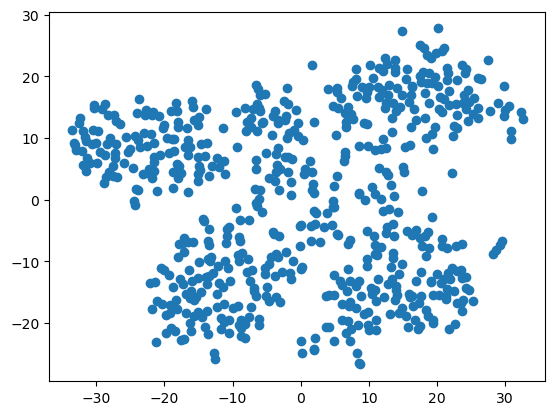

In [16]:
# Plot the results
plt.scatter(df_myopia_tsne["X"], df_myopia_tsne["Y"])
plt.show()

There seem to be **5 distinct clusters**. 

In [17]:
# The target labels can optionally be used to color the t-SNE plot
# Add the target column MYOPIC from the dataset before cleanup to the tsne dataframe
df_myopia_tsne["class"] = df["MYOPIC"]
df_myopia_tsne

,X,Y,class
0,12.705326,-4.362546,1
1,-13.873791,-12.524539,0
2,16.661167,14.786345,0
3,-24.369736,-0.856750,1
4,6.021355,-13.799365,0
...,...,...,...
613,6.887650,-7.125078,1
614,-13.402410,-12.410923,0
615,-12.677463,-24.826187,0
616,22.938938,13.747002,0


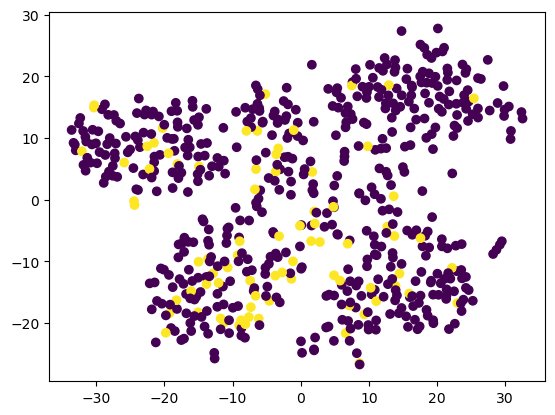

In [18]:
# Results colored by target value
plt.scatter(df_myopia_tsne["X"], df_myopia_tsne["Y"], c = df_myopia_tsne["class"])
plt.show()

Though there are 5 clusters, as seen above, a simple YES or NO to indicate if a patient is Myopic isn't sufficient as this has no correlation with the clusters.

# Part 3: Perform a Cluster Analysis with K-means

    Create an elbow plot to identify the best number of clusters
    - Use a for loop to determine the inertia for each k between 1 through 10.
    - If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [19]:
# Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\SENAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,286557.625000
1,2,157434.953125
2,3,95685.757812
3,4,58599.039062
4,5,41458.468750
5,6,35965.710938
6,7,31002.343750
7,8,26773.097656
8,9,23380.042969
9,10,20510.408203


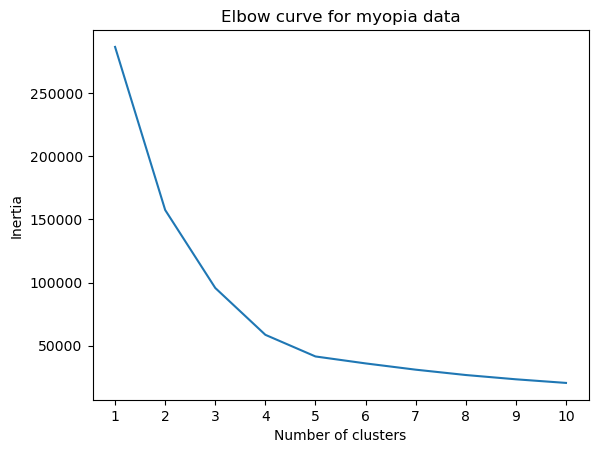

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
#plt.grid()
plt.show()

Looking at the plot, **elbow seems to appear at k = 5**

# Part 4: Make a Recommendation

Based on the findings, write up a brief (one or two sentences) recommendation. Can the patients be clustered? If so, into how many clusters?

In [21]:
#  Function to find the k clusters using K-Means on data. 
# The function returns a DataFrame copy of Data that includes a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [22]:
# Analyzing Clusters with the Best Value of k
clusters = get_clusters(5, df_myopia_tsne)
clusters

,X,Y,class
0,12.705326,-4.362546,0
1,-13.873791,-12.524539,4
2,16.661167,14.786345,1
3,-24.369736,-0.856750,2
4,6.021355,-13.799365,0
...,...,...,...
613,6.887650,-7.125078,0
614,-13.402410,-12.410923,4
615,-12.677463,-24.826187,4
616,22.938938,13.747002,1


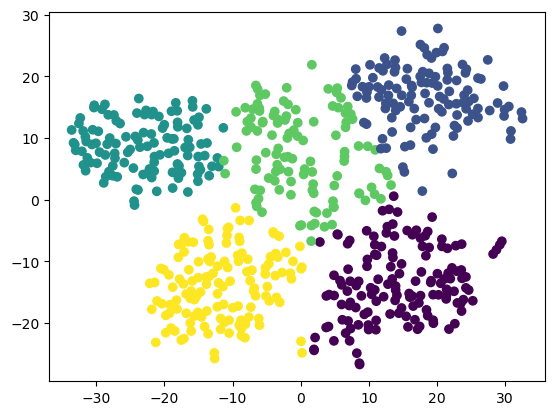

In [23]:
# Plot the results
plt.scatter(clusters["X"], clusters["Y"], c = clusters["class"])
plt.show()

**Conclusion**: 
Based on the tSNE scatter plot, elbow curve and K-Means Clustering, it can be seen that the patients can be placed into 5 distinct groups. However, the data will have to be analysed further to understand what these 5 clusters are and how effectively these can be used to predict Myopia. 